# Steelers, Cowboys, and Bears
## Using Sets to Explore American Football Teams
### How Many Players Have Been on Each Team?

In [1]:
%matplotlib inline
# Python magic to display in the web browser

In [2]:
!pip install matplotlib_venn

    100% |████████████████████████████████| 40kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for matplotlib-venn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d8/88/2f/e41518cb16e58109e8d14dc5dd7ef8166c82dce86c7c6d6c80
Successfully built matplotlib-venn
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pickle
from matplotlib_venn import venn2_circles, venn2, venn3
import matplotlib.pyplot as plt

In [4]:
with open("./football.pickle","rb") as f0:
    teams = pickle.load(f0)

#### ``teams`` is a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) with

* **keys** equal to name of football teams
* **values** equal to a [**list**](https://docs.python.org/3.4/tutorial/introduction.html#lists) of all the players that have played on those teams

In [5]:
type(teams)

dict

In [6]:
teams.keys()

dict_keys(['cowboys', 'bears', 'steelers'])

In [7]:
type(teams['steelers'])

list

### Let's look at the list of Steelers players

### Size of a collection

Every Python collection has a size (length) associated with it. This is a measure of how many objects are in the collection. This is accessed through the **``len()``** function. (Remember our definition of a function: it takes something in (in this case a collection) and returns something (in this case the length of the collection).

In [8]:
print(len(teams))
print(len(teams['steelers']))

3
1668


### We can create a **set** from the **list** of Steelers players

#### Python has a ``set()`` function that takes another type of collection (e.g. a list) and creates a set

In [9]:
steelers_set = set(teams['steelers'])
len(steelers_set)

1666

### Why are the sizes (lengths) of the two sets different?

* Lists do not have to have unique elements, but sets do (definition of a set). There are two names that two sets of players shared.

#### Python Aside finding the duplicate players

We're focusing on Python [**sets**](https://docs.python.org/3.4/tutorial/datastructures.html#sets), but here is a way to find the names using a Python [**Counter**](https://docs.python.org/3/library/collections.html#collections.Counter). Quite simply, Counters count things. They can then return the most commonly occuring items that they counted.

In [10]:
from collections import Counter

steelers_count = Counter(teams['steelers'])
steelers_count.most_common(10)

[('Mike Adams', 2),
 ('Ralph Wenzel', 2),
 ('Walter Abercrombie', 1),
 ('Ed Adamchik', 1),
 ('Bob Adams', 1),
 ('Flozell Adams', 1),
 ('Ben Agajanian', 1),
 ('Dick Alban', 1),
 ('Tom Alberghini', 1),
 ('Art Albrecht', 1)]

#### So there have been two Ralph Wenzel (who would have thought!) and two Mike Adams (not so surprising). Or perhaps they were n the team at two seperate times.

### Now let's make sets for the other two teams

In [11]:
bears_set = set(teams['bears'])
cowboys_set = set(teams['cowboys'])

len(bears_set),len(cowboys_set)

(225, 954)

### Let's look at the sets with a Venn diagram

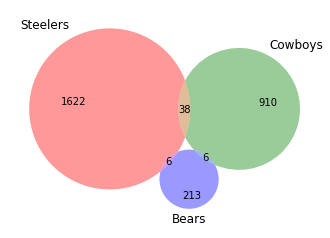

In [12]:
venn3([steelers_set, cowboys_set, bears_set],
      ("Steelers","Cowboys","Bears"))

### Anything Seem Suspicious About These Data?

* The [Chicago Bears](https://en.wikipedia.org/wiki/Chicago_Bears) are a very old football team, dating back to 1919. Do we really believe that there have been eight times as many [Steelers](https://en.wikipedia.org/wiki/Pittsburgh_Steelers) (founded 1933) and over four times as many [Cowboys](https://en.wikipedia.org/wiki/Dallas_Cowboys) (founded 1960)?
    * Maybe something problematic with our Wikipedia data? 
    * Check against another source?

#### Which Steelers have also been Cowboys or Bears?

This question involves 

* three sets (Steelers, Cowboys, and Bears)
* two set operations
    * "have also been" $\rightarrow$ **AND** $\rightarrow$ **INTERSECTION**
    * "or" $\rightarrow$ **UNION**

##### We can write this out in set notation

$ \text{Steelers} \cap (\text{Cowboys} \cup \text{Bears})$

In [13]:
steelers_on_other_teams = steelers_set.intersection(
                               bears_set.union(cowboys_set))
print("There have been %d Steelers that have played on other teams."\
      %len(steelers_on_other_teams))
print("These Steelers are")
print(steelers_on_other_teams)


There have been 44 Steelers that have played on other teams.
These Steelers are
{'Thomas Everett', 'Don Bishop', 'Cliff Stoudt', 'James Parrish', 'Ernie Mills', 'Joey Galloway', 'Quincy Morgan', 'Robert Williams', 'Cornell Gowdy', 'Lee Folkins', 'Tim Lester', 'Bill Butler', 'Joe Williams', 'Kevin Smith', 'Larry Brown', 'Paul Oswald', 'Anthony Wright', 'Mike Clark', 'Wentford Gaines', 'Donnell Woolford', 'Shaun Suisham', 'Ray Fisher', 'Oliver Ross', 'Mike Quinn', 'Ed Brown', 'Stan Smagala', 'Buddy Dial', 'Felix Jones', 'Jim Miller', 'Mike Tomczak', 'Rudy Bukich', 'Dick Klein', 'Merril Hoge', 'Flozell Adams', 'Amos Bullocks', 'Don Heinrich', 'Ray Mathews', 'Rocky Boiman', 'Mike Connelly', 'Junior Glymph', 'Preston Pearson', 'Reggie Barnes', 'Reggie Collier', 'Dave Edwards'}


####  What players have played on all three teams?

This question involves three sets (Steelers, Cowboys, Bears) and two Set operations: **Intersection** and **Intersection.**

##### Writing this in set notation

$ \text{Steelers} \cap \text{Cowboys} \cap \text{Bears}$


In [14]:
steelers_set.intersection(bears_set.intersection(cowboys_set))

set()

#### Note that this is Consistent with the Venn diagram above